# Import necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Model metrics for evaluation and data splitting
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error

from sklearn import metrics

from sklearn.model_selection import train_test_split, cross_val_score

# Visualization for missing data
import missingno as msno

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    BaggingRegressor,
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

from xgboost import XGBRegressor

#SHAP
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
All = pd.ExcelFile('allData.xls')
data = pd.read_excel(All, 'Data')
data

,Number,Data source,Selected,Mix number in literature,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),...,Annual average temperature of exposed environment (Celsius degree),Annual wetting times/rainy days of exposed environment (d),Annual average precipitation of exposed environment (mm),Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size,Note
0,NaN,2. Yunusa 2014,NaN,PC-40,0.000,0.000,450.000,0.000,0.000,0.000,...,24.300,0.000,0.000,30.000,75.930,NaN,NaN,3.139,NaN,No significant effect of initial water curing ...
1,NaN,2. Yunusa 2014,NaN,PC-50,0.000,0.000,400.000,0.000,0.000,0.000,...,24.300,0.000,0.000,60.000,64.500,NaN,NaN,4.022,NaN,NaN
2,NaN,2. Yunusa 2014,NaN,PC-60,0.000,0.000,350.000,0.000,0.000,0.000,...,24.300,0.000,0.000,100.000,49.230,NaN,NaN,6.670,NaN,NaN
3,NaN,2. Yunusa 2014,NaN,PC-75,0.000,0.000,300.000,0.000,0.000,0.000,...,24.300,0.000,0.000,140.000,36.000,NaN,NaN,7.945,NaN,NaN
4,NaN,2. Yunusa 2014,NaN,FA-40,0.000,0.000,315.000,0.000,135.000,0.000,...,24.300,0.000,0.000,40.000,62.800,NaN,NaN,6.052,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,NaN,"J48. Farahani, 2015",NaN,W3-4,350.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.550,NaN,150*150*150,NaN
1984,NaN,"J48. Farahani, 2015",NaN,W4-1,380.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.375,NaN,150*150*150,NaN
1985,NaN,"J48. Farahani, 2015",NaN,W4-2,370.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,150*150*150,NaN
1986,NaN,"J48. Farahani, 2015",NaN,W4-3,360.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.500,NaN,150*150*150,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 34 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Number                                                              0 non-null      float64
 1   Data source                                                         1988 non-null   object 
 2   Selected                                                            194 non-null    object 
 3   Mix number in literature                                            1988 non-null   object 
 4   ASTM type 1 ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 5   CEM I 42.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 6   CEM I 52.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 7   Class C Fly ash

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTM type 1 ordinary Portland Cement content (kg/m^3),1988.000,39.318,106.826,0.000,0.000,0.000,0.000,702.000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),1988.000,95.567,146.591,0.000,0.000,0.000,210.000,547.000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),1988.000,147.093,152.375,0.000,0.000,155.000,280.000,660.000
Class C Fly ash content (kg/m^3),1988.000,6.120,28.792,0.000,0.000,0.000,0.000,225.000
Class F Fly ash content (kg/m^3),1988.000,35.498,65.745,0.000,0.000,0.000,56.500,544.000
Slag content (kg/m^3),1988.000,34.630,73.838,0.000,0.000,0.000,0.000,440.000
Silica fume content (kg/m^3),1988.000,7.593,21.082,0.000,0.000,0.000,0.000,150.000
Water content (kg/m^3),1988.000,172.241,28.372,105.000,153.000,170.000,186.000,295.000
Superplasticizer content (kg/m^3),1988.000,2.336,4.726,0.000,0.000,0.000,2.703,35.100


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

Number                                                                1988
Data source                                                              0
Selected                                                              1794
Mix number in literature                                                 0
ASTM type 1 ordinary Portland Cement content (kg/m^3)                    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)                    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)                    0
Class C Fly ash content (kg/m^3)                                         0
Class F Fly ash content (kg/m^3)                                         0
Slag content (kg/m^3)                                                    0
Silica fume content (kg/m^3)                                             0
Water content (kg/m^3)                                                   0
Superplasticizer content (kg/m^3)                                        0
Maximum coarse aggregate 

In [7]:
data.isnull().sum()
Excess_col_indices = [0] + list(range(2, 4)) + list(range(20, 27)) + [33]
semi_df = data.iloc[:, [col for col in range(data.shape[1]) if col not in Excess_col_indices]]
semi_df

,Data source,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),...,Curing method,Curing temperature (Celsius degree),Curing humidity (%),Curing day,Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size
0,2. Yunusa 2014,0.000,0.000,450.000,0.000,0.000,0.000,0.000,180.000,4.000,...,Submerged,20.000,100.000,3.000,30.000,75.930,NaN,NaN,3.139,NaN
1,2. Yunusa 2014,0.000,0.000,400.000,0.000,0.000,0.000,0.000,200.000,3.250,...,Submerged,20.000,100.000,3.000,60.000,64.500,NaN,NaN,4.022,NaN
2,2. Yunusa 2014,0.000,0.000,350.000,0.000,0.000,0.000,0.000,210.000,0.000,...,Submerged,20.000,100.000,3.000,100.000,49.230,NaN,NaN,6.670,NaN
3,2. Yunusa 2014,0.000,0.000,300.000,0.000,0.000,0.000,0.000,225.000,0.000,...,Submerged,20.000,100.000,3.000,140.000,36.000,NaN,NaN,7.945,NaN
4,2. Yunusa 2014,0.000,0.000,315.000,0.000,135.000,0.000,0.000,180.000,1.750,...,Submerged,20.000,100.000,3.000,40.000,62.800,NaN,NaN,6.052,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,"J48. Farahani, 2015",350.000,0.000,0.000,0.000,0.000,0.000,50.000,180.000,2.000,...,Submerged,21.000,100.000,28.000,NaN,NaN,NaN,1.550,NaN,150*150*150
1984,"J48. Farahani, 2015",380.000,0.000,0.000,0.000,0.000,0.000,20.000,200.000,0.800,...,Submerged,21.000,100.000,28.000,NaN,NaN,NaN,3.375,NaN,150*150*150
1985,"J48. Farahani, 2015",370.000,0.000,0.000,0.000,0.000,0.000,30.000,200.000,1.200,...,Submerged,21.000,100.000,28.000,NaN,NaN,NaN,1.000,NaN,150*150*150
1986,"J48. Farahani, 2015",360.000,0.000,0.000,0.000,0.000,0.000,40.000,200.000,1.800,...,Submerged,21.000,100.000,28.000,NaN,NaN,NaN,0.500,NaN,150*150*150


In [8]:
semi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data source                                            1988 non-null   object 
 1   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 4   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 6   Slag content (kg/m^3)                                  1988 non-null   float64
 7   Silica fume content (kg/m^3)                           1988 non-null   float64
 8   Water content (kg/m^3)                          

In [9]:
semi_df.describe()

,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Maximum coarse aggregate size (mm),Coarse aggregate content (kg/m^3),Fine aggregate content (kg/m^3),Curing temperature (Celsius degree),Curing humidity (%),Curing day,Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5)
count,1988.000,1988.000,1988.000,1988.000,1988.000,1988.000,1988.000,1988.000,1988.000,1988.000,1983.000,1983.000,1980.000,1980.000,1978.000,820.000,1942.000,62.000,66.000,1095.000
mean,39.318,95.567,147.093,6.120,35.498,34.630,7.593,172.241,2.336,18.122,1005.264,814.084,21.535,95.007,25.849,105.310,51.545,3.679,5.240,3.719
std,106.826,146.591,152.375,28.792,65.745,73.838,21.082,28.372,4.726,3.829,163.278,142.480,2.892,12.286,23.382,57.099,20.912,1.114,6.095,2.691
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,105.000,0.000,9.500,276.000,279.000,13.000,25.000,1.000,0.000,5.000,0.960,0.500,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,153.000,0.000,16.000,879.000,696.000,20.000,95.000,14.000,70.000,37.500,2.910,2.094,1.719
50%,0.000,0.000,155.000,0.000,0.000,0.000,0.000,170.000,0.000,20.000,1015.000,800.000,20.000,100.000,28.000,100.000,49.429,3.570,3.144,3.193
75%,0.000,210.000,280.000,0.000,56.500,0.000,0.000,186.000,2.703,20.000,1115.000,928.500,22.000,100.000,28.000,130.000,62.800,4.390,5.920,5.098
max,702.000,547.000,660.000,225.000,544.000,440.000,150.000,295.000,35.100,30.000,1388.600,1293.000,38.000,100.000,191.000,260.000,443.000,6.180,37.030,18.477


# EDA

## Uni variate

In [10]:
# function to plot a boxplot and a histogram along the same scale.

def hist_boxplot(data, feature, figsize = (12,7),kde = True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex= True,
        gridspec_kw ={'height_ratios': (0.25,0.75)},
        figsize = figsize)
    sns.boxplot(data=data, x =feature, ax = ax_box2, showmeans = True, color = 'violet')

    if bins:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, bins=bins, palette = 'winter')

    else:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')
    ax_hist2.axvline(data[feature].mean(), color = 'green', linestyle = "--")
    ax_hist2.axvline(data[feature].median(), color = 'black', linestyle = "-")

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Ignoring `palette` because no `hue` variable has been assigned.


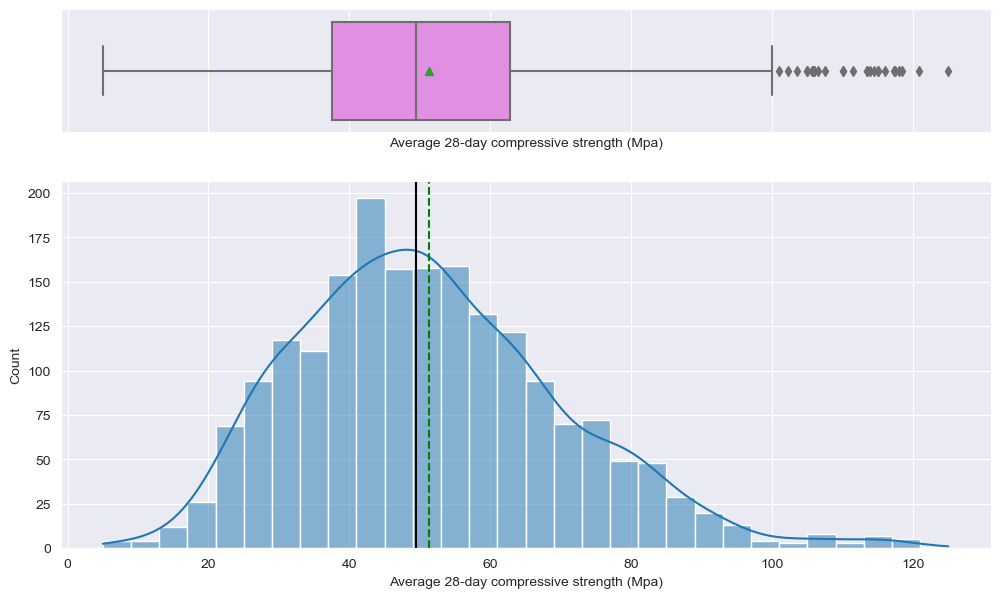

In [12]:
# Quick fix 

filtered_row = semi_df[semi_df['Average 28-day compressive strength (Mpa)'] > 400]

if len(filtered_row) == 1:
    value_to_divide = filtered_row['Average 28-day compressive strength (Mpa)'].values[0]
    updated_value = value_to_divide / 10

    # Update the value in the DataFrame
    semi_df.loc[semi_df['Average 28-day compressive strength (Mpa)'] > 400, 'Average 28-day compressive strength (Mpa)'] = updated_value
else:
    print("No rows or multiple rows matching the condition.")

hist_boxplot(semi_df, 'Average 28-day compressive strength (Mpa)')

In [13]:
semi_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ASTM type 1 ordinary Portland Cement content (kg/m^3),1988.000,39.318,106.826,0.000,0.000,0.000,0.000,702.000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),1988.000,95.567,146.591,0.000,0.000,0.000,210.000,547.000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),1988.000,147.093,152.375,0.000,0.000,155.000,280.000,660.000
Class C Fly ash content (kg/m^3),1988.000,6.120,28.792,0.000,0.000,0.000,0.000,225.000
Class F Fly ash content (kg/m^3),1988.000,35.498,65.745,0.000,0.000,0.000,56.500,544.000
Slag content (kg/m^3),1988.000,34.630,73.838,0.000,0.000,0.000,0.000,440.000
Silica fume content (kg/m^3),1988.000,7.593,21.082,0.000,0.000,0.000,0.000,150.000
Water content (kg/m^3),1988.000,172.241,28.372,105.000,153.000,170.000,186.000,295.000
Superplasticizer content (kg/m^3),1988.000,2.336,4.726,0.000,0.000,0.000,2.703,35.100
Maximum coarse aggregate size (mm),1988.000,18.122,3.829,9.500,16.000,20.000,20.000,30.000


## Bi variate

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


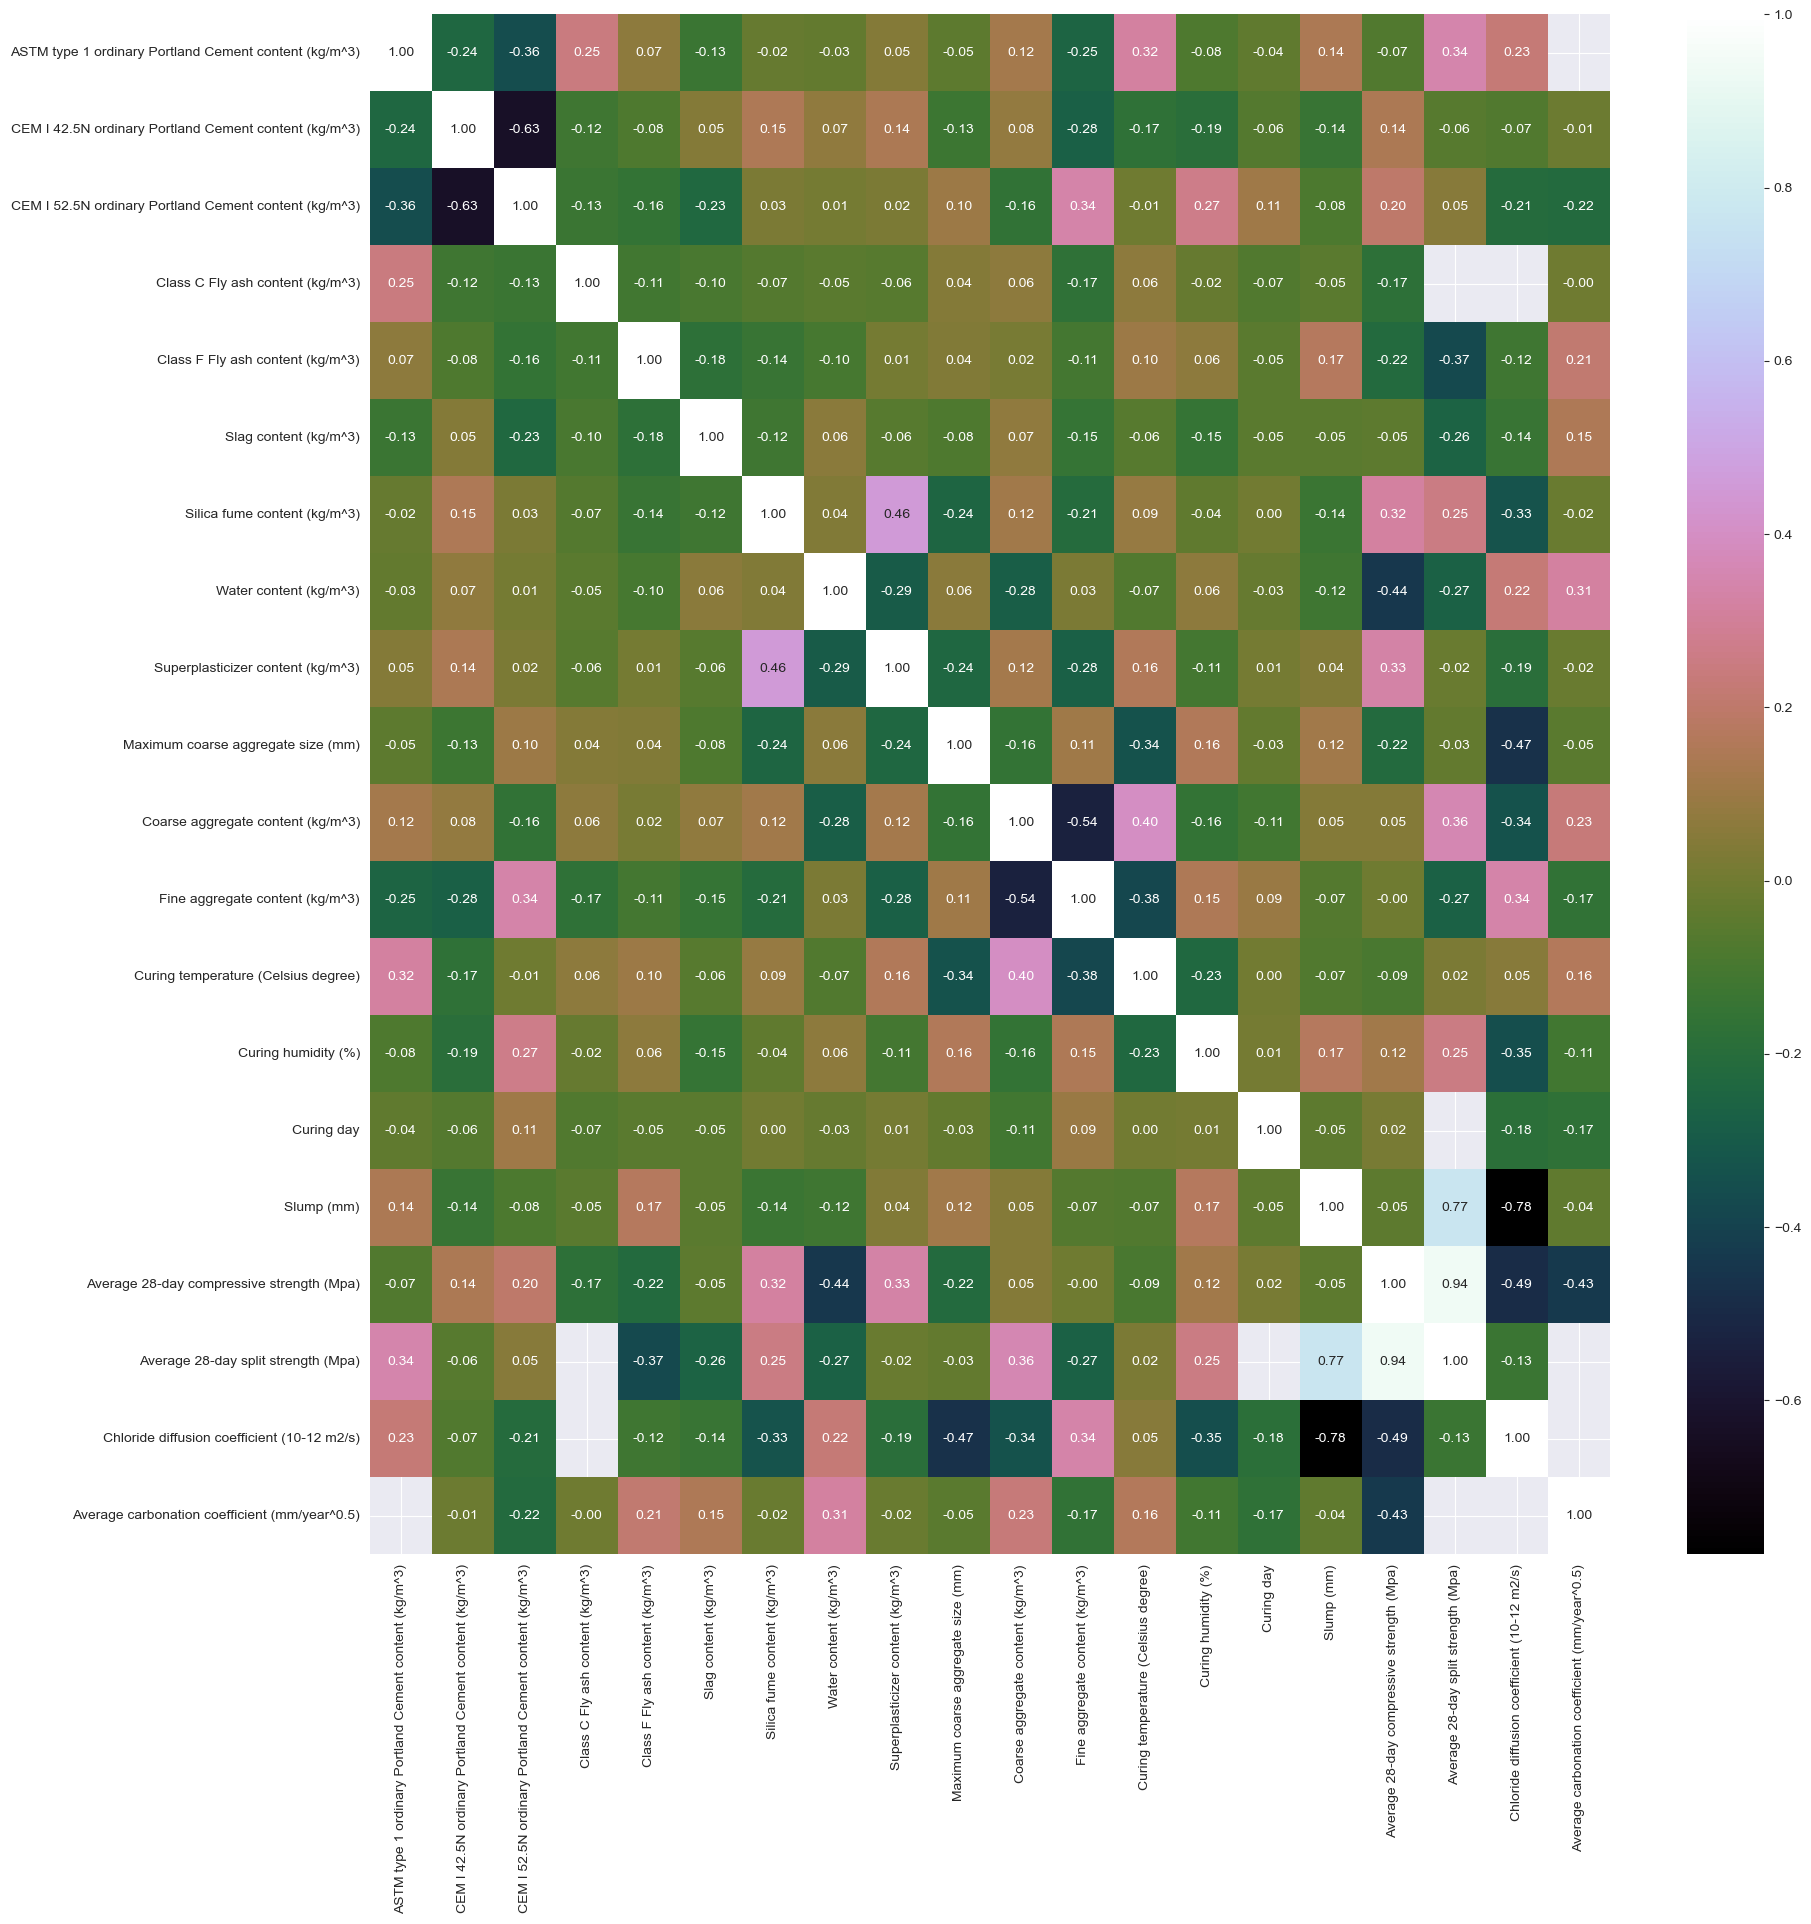

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(semi_df.corr(), annot = True, fmt='.2f', cmap = 'cubehelix')
plt.show()

In [15]:
#sns.pairplot(semi_df, hue= 'Data source', diag_kind= 'kde');
#plt.show()

# Data Preprocessing

## Outlier Detection

In [16]:
Q1 = semi_df.quantile(0.25)  # To find the 25th percentile
Q3 = semi_df.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


In [17]:
# checking the % outliers
outliers = ((semi_df.select_dtypes(include=["float64", "int64"]) < lower) | (semi_df.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(semi_df) * 100
outliers

ASTM type 1 ordinary Portland Cement content (kg/m^3)   13.431
CEM I 42.5N ordinary Portland Cement content (kg/m^3)    0.101
CEM I 52.5N ordinary Portland Cement content (kg/m^3)    0.000
Class C Fly ash content (kg/m^3)                         5.684
Class F Fly ash content (kg/m^3)                         8.300
Slag content (kg/m^3)                                   24.950
Silica fume content (kg/m^3)                            14.839
Water content (kg/m^3)                                   2.767
Superplasticizer content (kg/m^3)                        9.909
Maximum coarse aggregate size (mm)                       0.905
Coarse aggregate content (kg/m^3)                        1.811
Fine aggregate content (kg/m^3)                          0.201
Curing temperature (Celsius degree)                      7.696
Curing humidity (%)                                     10.010
Curing day                                               3.773
Slump (mm)                                             

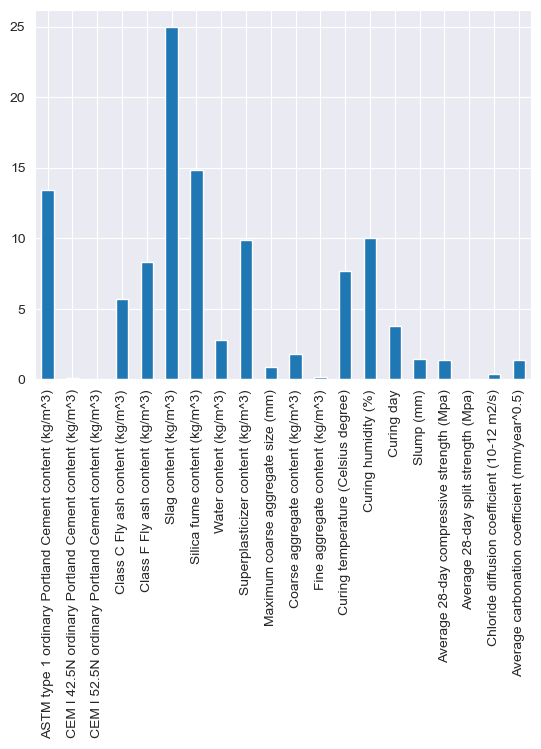

In [18]:
outliers.plot.bar()
plt.show()

## Feature Engineering 

In [19]:
num_df = semi_df.select_dtypes(include=np.number)
obj_df = semi_df.select_dtypes(include=['object'])

In [20]:
for col in obj_df.columns:
    value_counts = obj_df[col].value_counts()
    print(f"Column '{col}':")
    print(value_counts)
    print()

Column 'Data source':
1. Vu 2019            405
2. Yunusa 2014        144
J20. Atiş, 2005        96
J18. Cengiz 2006       90
20 Lollini 2021        72
                     ... 
11 Sundar 2017          4
22 Zhao 2021            4
J6. Li 1997             4
J30. Siddique 2004      4
J9. Li 2002             3
Name: Data source, Length: 71, dtype: int64

Column 'Curing method':
Submerged    837
Moist        503
Sealed       456
Air          184
Name: Curing method, dtype: int64

Column 'Specimen size':
150*150*150    461
200h*100r      215
100*100*100    158
100*100*300     22
300h*150r       12
100h*100r        5
Name: Specimen size, dtype: int64


In [21]:
semi_df = semi_df.drop(['Data source', 'Specimen size'], axis = 1)
semi_df

,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Maximum coarse aggregate size (mm),...,Fine aggregate content (kg/m^3),Curing method,Curing temperature (Celsius degree),Curing humidity (%),Curing day,Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5)
0,0.000,0.000,450.000,0.000,0.000,0.000,0.000,180.000,4.000,20.000,...,800.000,Submerged,20.000,100.000,3.000,30.000,75.930,NaN,NaN,3.139
1,0.000,0.000,400.000,0.000,0.000,0.000,0.000,200.000,3.250,20.000,...,877.000,Submerged,20.000,100.000,3.000,60.000,64.500,NaN,NaN,4.022
2,0.000,0.000,350.000,0.000,0.000,0.000,0.000,210.000,0.000,20.000,...,869.000,Submerged,20.000,100.000,3.000,100.000,49.230,NaN,NaN,6.670
3,0.000,0.000,300.000,0.000,0.000,0.000,0.000,225.000,0.000,20.000,...,810.000,Submerged,20.000,100.000,3.000,140.000,36.000,NaN,NaN,7.945
4,0.000,0.000,315.000,0.000,135.000,0.000,0.000,180.000,1.750,20.000,...,800.000,Submerged,20.000,100.000,3.000,40.000,62.800,NaN,NaN,6.052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,350.000,0.000,0.000,0.000,0.000,0.000,50.000,180.000,2.000,20.000,...,806.000,Submerged,21.000,100.000,28.000,NaN,NaN,NaN,1.550,NaN
1984,380.000,0.000,0.000,0.000,0.000,0.000,20.000,200.000,0.800,20.000,...,793.000,Submerged,21.000,100.000,28.000,NaN,NaN,NaN,3.375,NaN
1985,370.000,0.000,0.000,0.000,0.000,0.000,30.000,200.000,1.200,20.000,...,784.000,Submerged,21.000,100.000,28.000,NaN,NaN,NaN,1.000,NaN
1986,360.000,0.000,0.000,0.000,0.000,0.000,40.000,200.000,1.800,20.000,...,820.000,Submerged,21.000,100.000,28.000,NaN,NaN,NaN,0.500,NaN


The slump of concrete is a measure of its workability or consistency. It’s determined by filling a cone-shaped mold with fresh concrete, then measuring the subsidence after the removal of the mold12. The slump is typically expressed in millimeters or inches3.

The size of the concrete specimen can affect its strength. Research has shown that a decrease in the size of the specimen results in higher strength4. However, there isn’t a direct relationship between the slump of concrete and the size of the specimen. They are two different properties of concrete: slump measures workability while specimen size can influence strength.

As for converting slump values based on specimen size, there isn’t a standard method because the two properties measure different aspects of concrete. However, when designing concrete mixtures or specifying concrete, both the slump and the specimen size should be considered to ensure the concrete meets the desired workability and strength requirements1.

Please consult with a civil engineer or a concrete specialist for more specific advice on your concrete project. They can provide guidance based on the specific materials and conditions of your project.

1 https://codeconcrete.com/concrete-slump-meet-the-standards/
2 https://theconstructor.org/concrete/concrete-slump-test/1558/
3 https://acivilengineer.com/concrete-slump-test/
4 https://www.scielo.cl/pdf/rconst/v20n1/0718-915X-rconst-20-01-128.pdf
5 https://civilengineeringnotes.com/concrete-slump-test/
6 https://www.concrete.org/publications/internationalconcreteabstractsportal.aspx?m=details&ID=2252
7 https://www.concretenetwork.com/concrete-mix-design/slump.html
8 https://homesteady.com/13401135/how-to-calculate-slump-in-concrete

In [22]:
curing_method = {'Air':0,
                 'Sealed':1,
                 'Moist':2,
                 'Submerged':3,
                 }

semi_df['Curing method'] = semi_df['Curing method'].map(curing_method)
semi_df['Curing method'].value_counts()

3.000    837
2.000    503
1.000    456
0.000    184
Name: Curing method, dtype: int64

In [23]:
new_df = semi_df.copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Slag content (kg/m^3)                                  1988 non-null   float64
 6   Silica fume content (kg/m^3)                           1988 non-null   float64
 7   Water content (kg/m^3)                                 1988 non-null   float64
 8   Superplasticizer content (kg/m^3)               

In [24]:
new_df = new_df.drop(['Curing humidity (%)', 'Average carbonation coefficient (mm/year^0.5)', 'Chloride diffusion coefficient (10-12 m2/s)', 'Average 28-day split strength (Mpa)', 'Average 28-day compressive strength (Mpa)', 'Curing day'], axis = 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 15 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Slag content (kg/m^3)                                  1988 non-null   float64
 6   Silica fume content (kg/m^3)                           1988 non-null   float64
 7   Water content (kg/m^3)                                 1988 non-null   float64
 8   Superplasticizer content (kg/m^3)               

In [25]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ASTM type 1 ordinary Portland Cement content (kg/m^3),1988.000,39.318,106.826,0.000,0.000,0.000,0.000,702.000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),1988.000,95.567,146.591,0.000,0.000,0.000,210.000,547.000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),1988.000,147.093,152.375,0.000,0.000,155.000,280.000,660.000
Class C Fly ash content (kg/m^3),1988.000,6.120,28.792,0.000,0.000,0.000,0.000,225.000
Class F Fly ash content (kg/m^3),1988.000,35.498,65.745,0.000,0.000,0.000,56.500,544.000
Slag content (kg/m^3),1988.000,34.630,73.838,0.000,0.000,0.000,0.000,440.000
Silica fume content (kg/m^3),1988.000,7.593,21.082,0.000,0.000,0.000,0.000,150.000
Water content (kg/m^3),1988.000,172.241,28.372,105.000,153.000,170.000,186.000,295.000
Superplasticizer content (kg/m^3),1988.000,2.336,4.726,0.000,0.000,0.000,2.703,35.100
Maximum coarse aggregate size (mm),1988.000,18.122,3.829,9.500,16.000,20.000,20.000,30.000


# Missing values

In [26]:
new_df.isnull().sum()

ASTM type 1 ordinary Portland Cement content (kg/m^3)       0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)       0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)       0
Class C Fly ash content (kg/m^3)                            0
Class F Fly ash content (kg/m^3)                            0
Slag content (kg/m^3)                                       0
Silica fume content (kg/m^3)                                0
Water content (kg/m^3)                                      0
Superplasticizer content (kg/m^3)                           0
Maximum coarse aggregate size (mm)                          0
Coarse aggregate content (kg/m^3)                           5
Fine aggregate content (kg/m^3)                             5
Curing method                                               8
Curing temperature (Celsius degree)                         8
Slump (mm)                                               1168
dtype: int64

<Axes: >

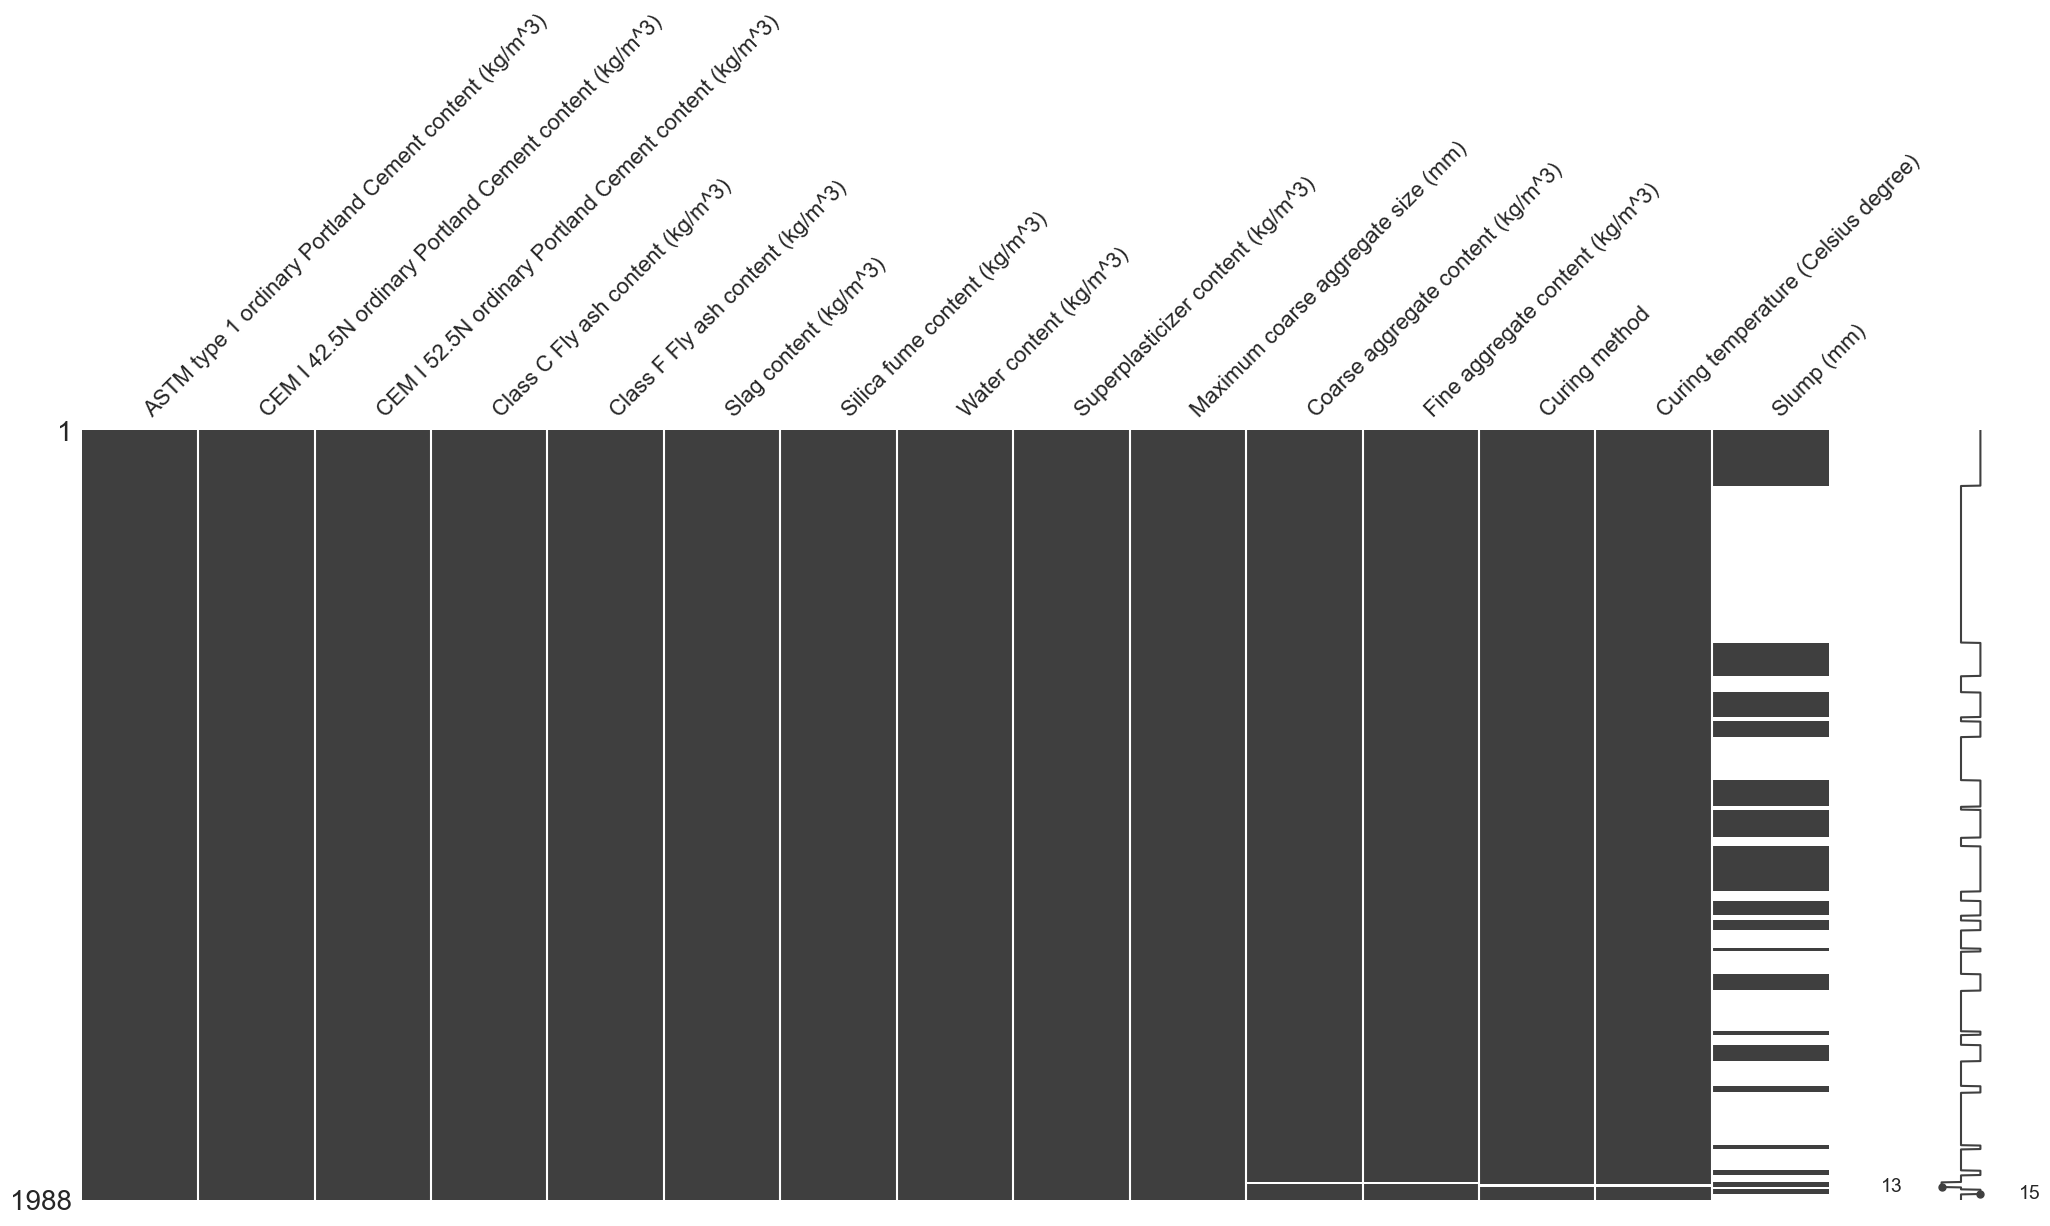

In [27]:
msno.matrix(new_df)

<Axes: >

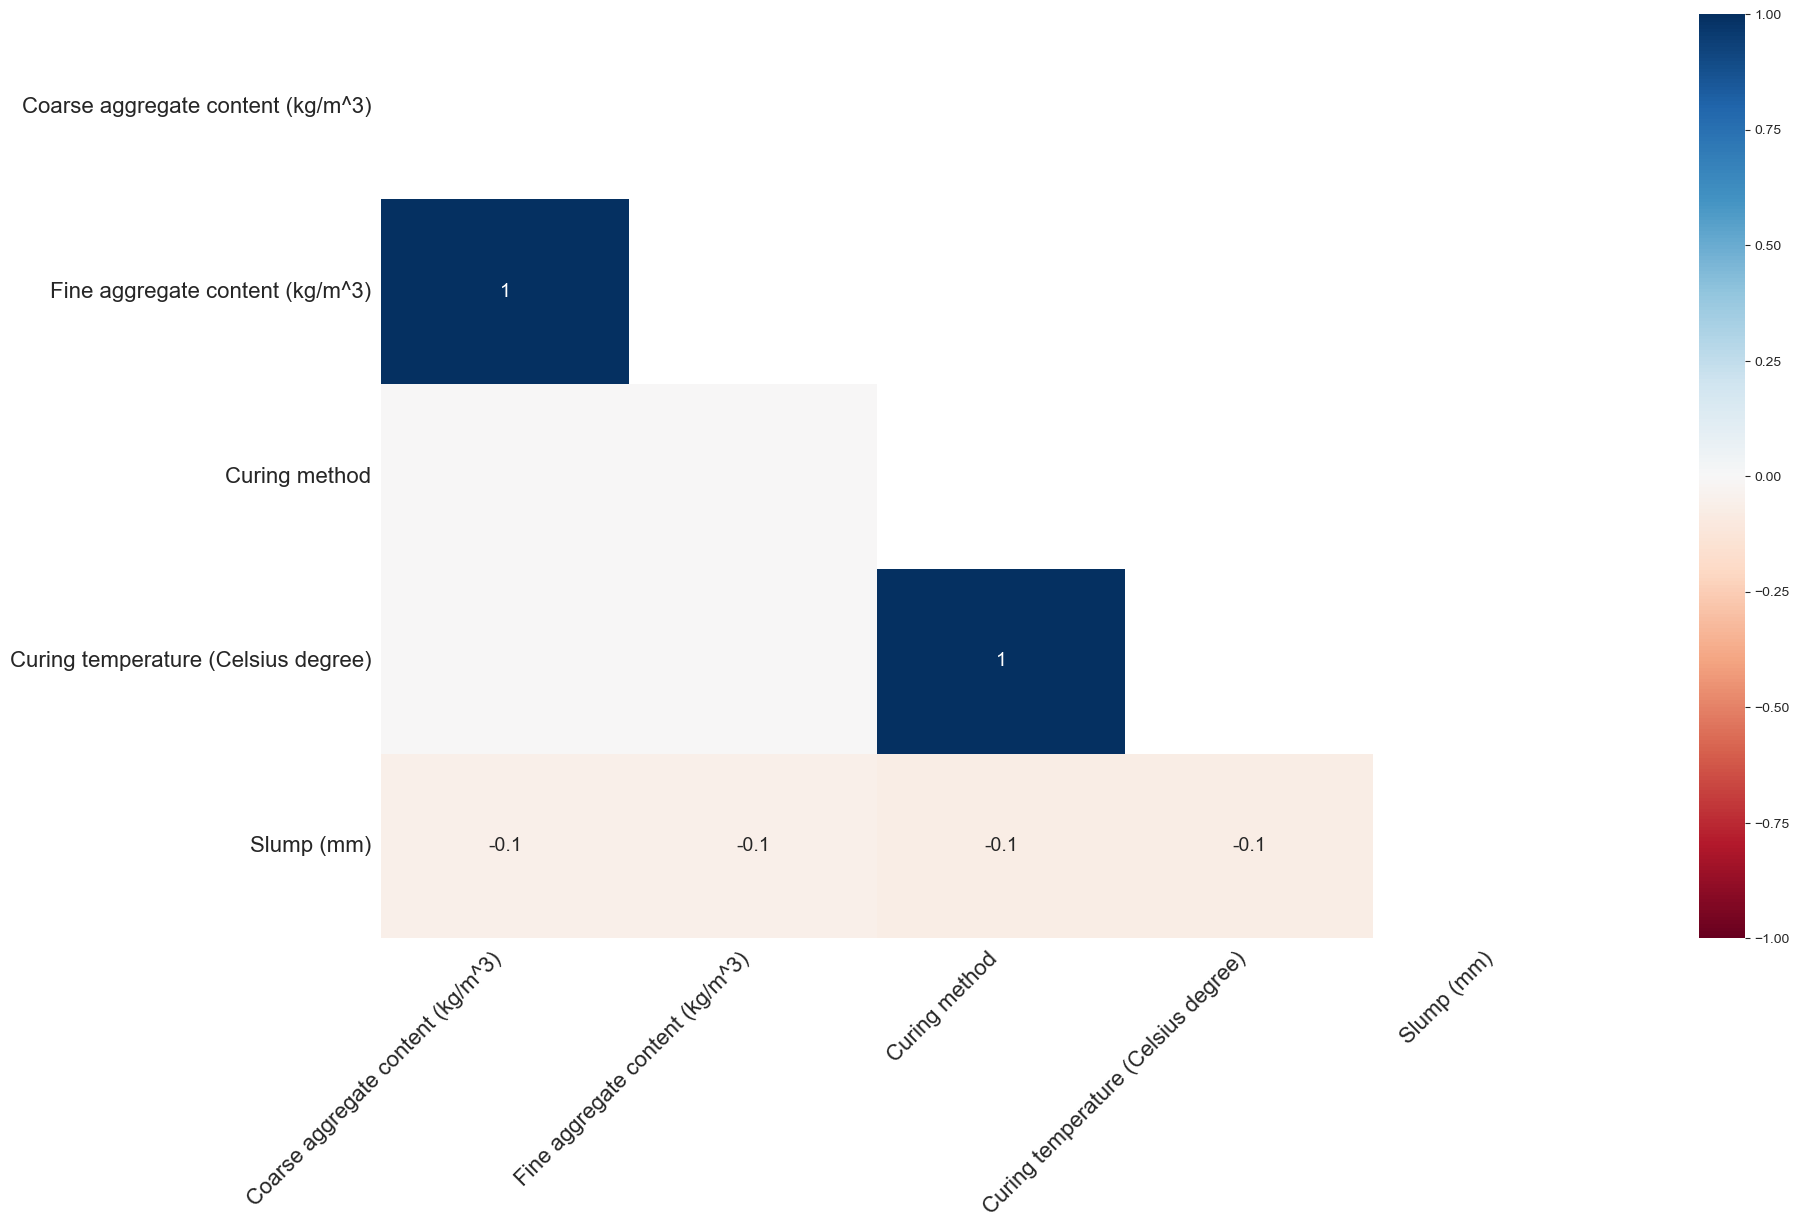

In [28]:
msno.heatmap(new_df)

# Train-test split (drop na)

In [29]:
new_df_drop = new_df.copy()
new_df_drop.dropna(inplace = True)

In [30]:
new_df_drop.isnull().sum()

ASTM type 1 ordinary Portland Cement content (kg/m^3)    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)    0
Class C Fly ash content (kg/m^3)                         0
Class F Fly ash content (kg/m^3)                         0
Slag content (kg/m^3)                                    0
Silica fume content (kg/m^3)                             0
Water content (kg/m^3)                                   0
Superplasticizer content (kg/m^3)                        0
Maximum coarse aggregate size (mm)                       0
Coarse aggregate content (kg/m^3)                        0
Fine aggregate content (kg/m^3)                          0
Curing method                                            0
Curing temperature (Celsius degree)                      0
Slump (mm)                                               0
dtype: int64

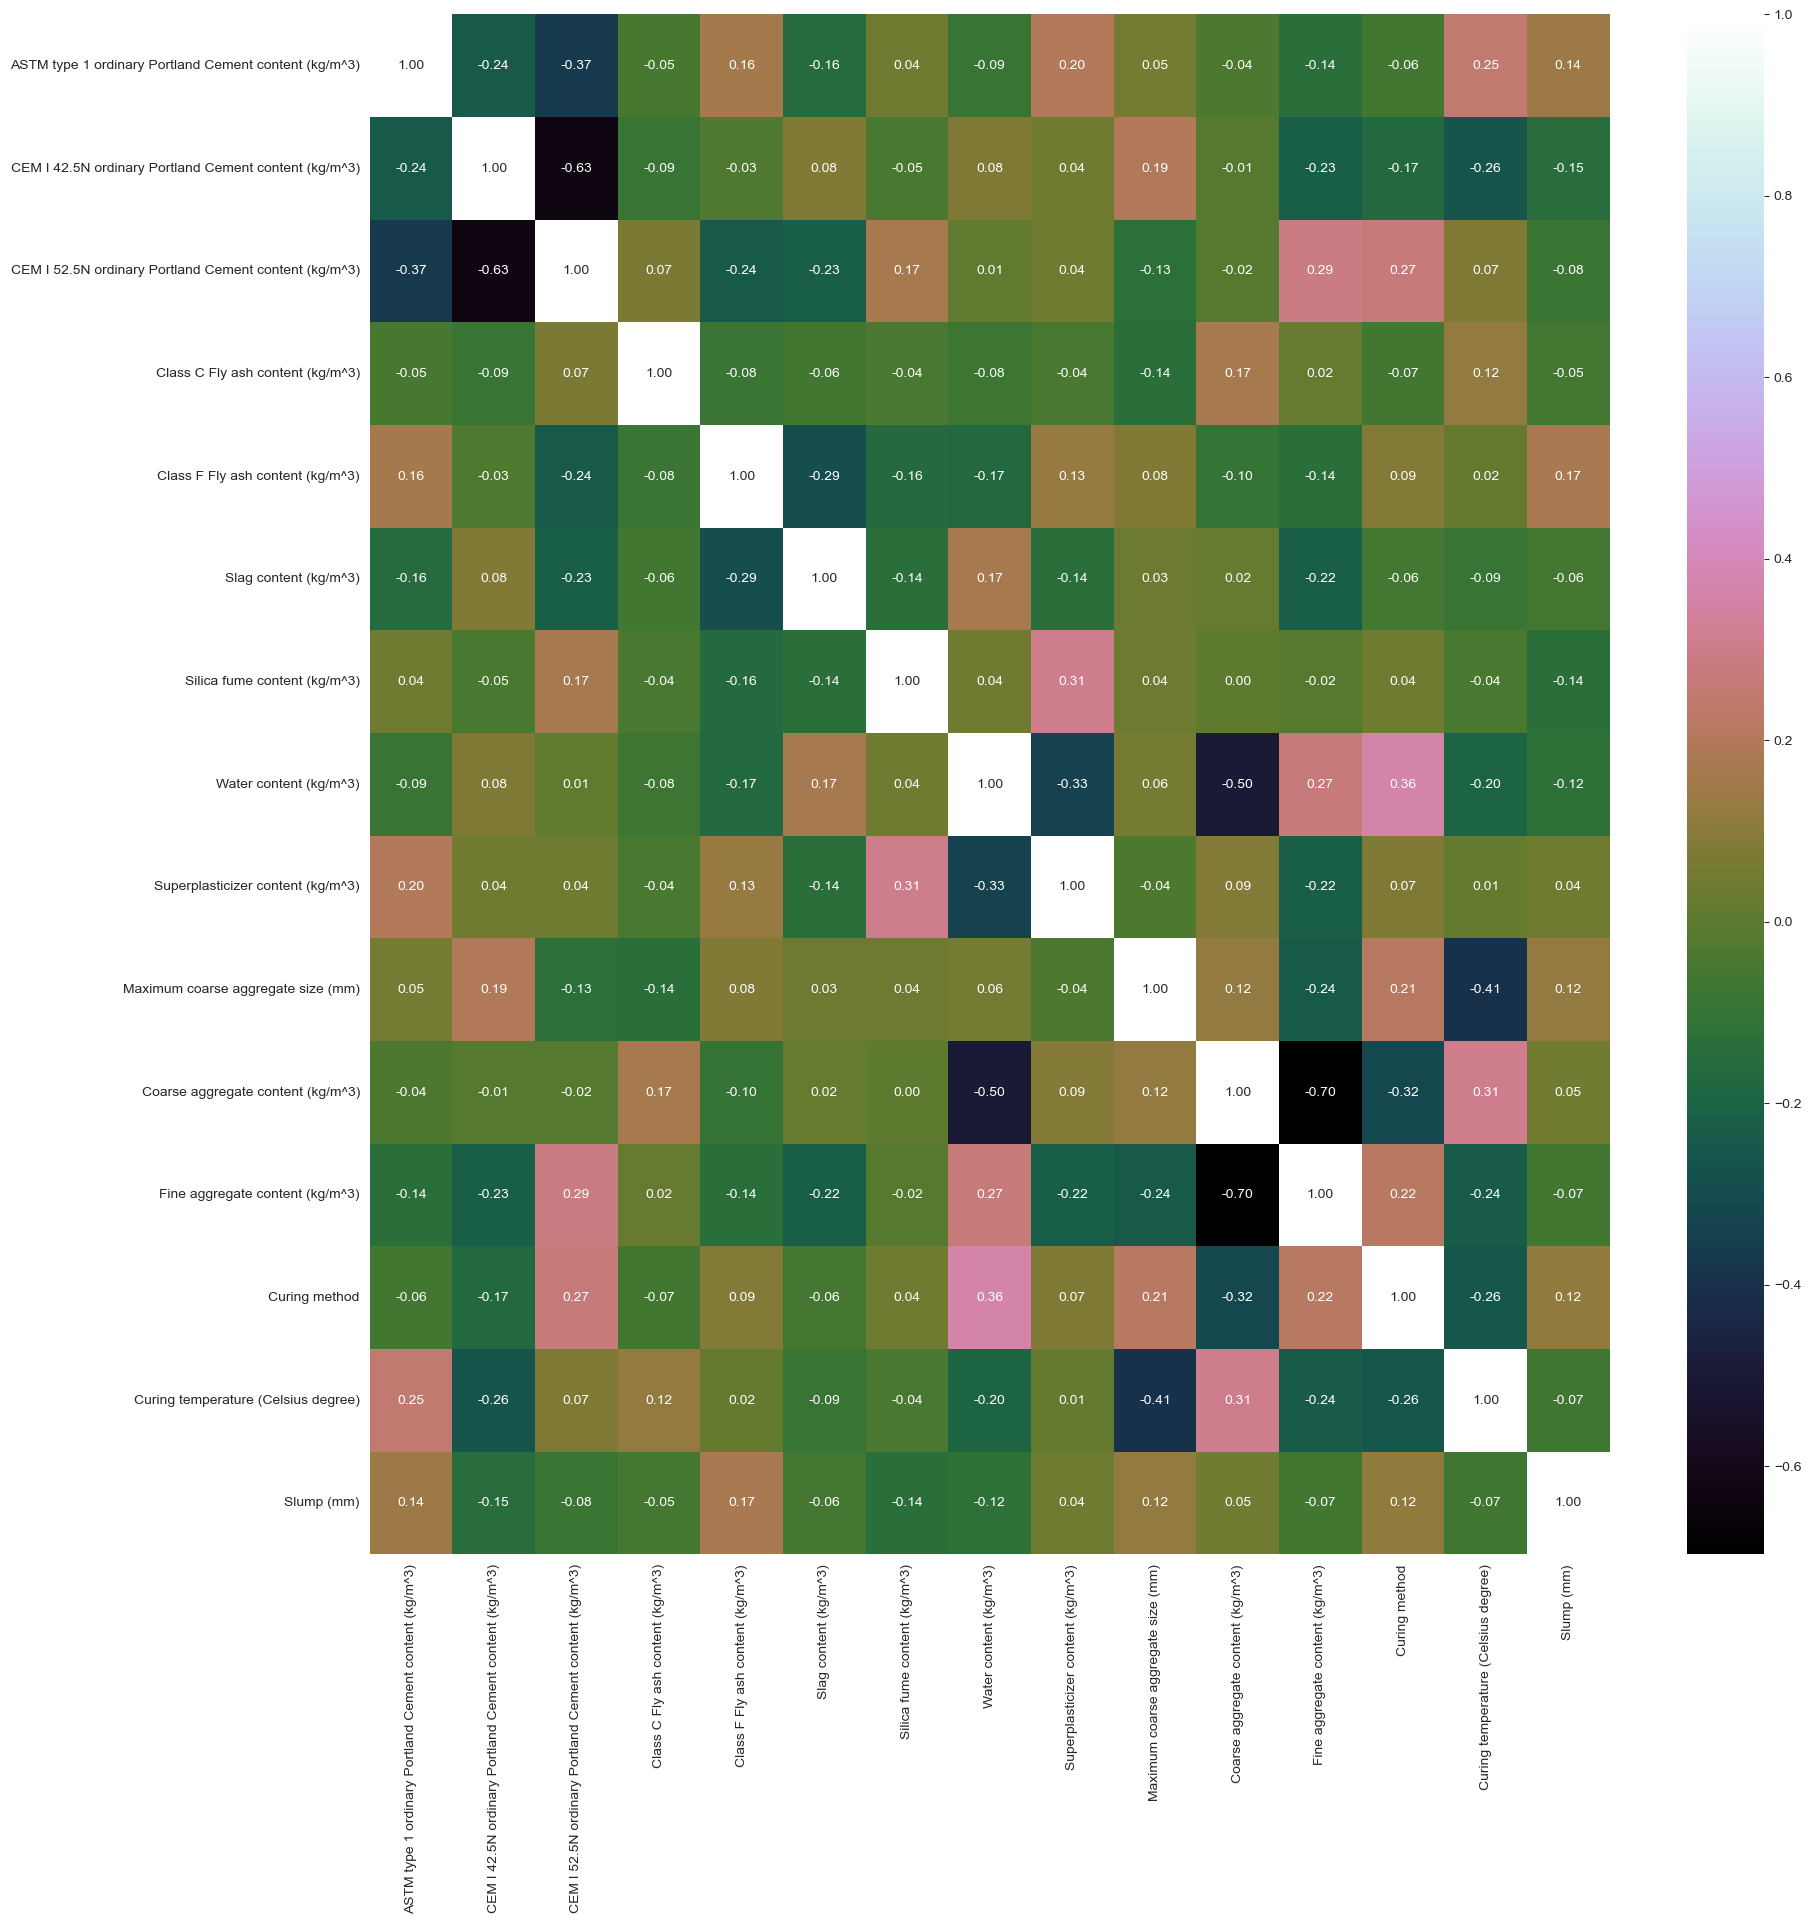

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df_drop.corr(), annot = True, fmt='.2f', cmap = 'cubehelix')
plt.show()

In [32]:
X = new_df_drop.drop('Slump (mm)', axis = 1)
Y = new_df_drop['Slump (mm)']

In [33]:
X_big, X_test, y_big, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_big,y_big, test_size = 0.2, random_state = 42,shuffle = True)

In [34]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(516, 14)
(129, 14)
(162, 14)


# Model Evaluation

* MAE, MSE, R-square, and Adjusted R-square

In [35]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [36]:
def model_performance_regression(predictors,target,pred):
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

In [37]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingRegressor(random_state=42)))
models.append(("Random forest", RandomForestRegressor(random_state=42)))
models.append(("AdaBoost", AdaBoostRegressor(random_state=42)))
models.append(("Gradient_Boost", GradientBoostingRegressor(random_state=42)))
models.append(("XGBoost", XGBRegressor(random_state=42)))

In [38]:
print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)  # Convert y_train to a 1-dimensional array
    scores = mean_squared_error(y_train.values.ravel(), model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)  # Convert y_train to a 1-dimensional array
    scores_val = mean_squared_error(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 77.57800706749107
Random forest: 67.91394584912253
AdaBoost: 851.1594274639066
Gradient_Boost: 204.65373464368258
XGBoost: 12.697435476372204

Validation Performance:

Bagging: 390.87835271317823
Random forest: 336.936785875461
AdaBoost: 988.6036683042726
Gradient_Boost: 461.58302183269683
XGBoost: 305.9958957704735


# Hyperparameter tuning

## Bagging

In [39]:
%%time

Bagging_model = BaggingRegressor(random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100],  # Number of base estimators (decision trees)
    'max_samples': [0.2, 0.3, 0.5, 0.8, 1.0],  # Proportion of samples to draw from the training set for each base estimator
    'max_features': [0.5, 0.8, 1.0],  # Proportion of features to consider for each base estimator
    'bootstrap': [True, False],  # Whether to sample with replacement (True) or without replacement (False)
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=Bagging_model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=42)

randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 10, 'max_samples': 0.2, 'max_features': 0.5, 'bootstrap': True} with CV score=1244.7675163848437:
CPU times: total: 938 ms
Wall time: 6.57 s


In [40]:
Tuned_Bagging = randomized_cv.best_estimator_
Tuned_Bagging = Tuned_Bagging.fit(X_train, y_train)
Tuned_Bagging_result = Tuned_Bagging.predict(X_val)
tuned_bagging_train = model_performance_regression(X_val, y_val, Tuned_Bagging_result)
tuned_bagging_train

,RMSE,MAE,R-squared,Adj. R-squared
0,27.823,19.812,0.750,0.719


## Random Forest

In [41]:
%%time

Random_Forest = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 300, 500],  # Number of decision trees in the random forest
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the decision trees
    'min_samples_split': [1, 2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 8),  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False],  # Whether to sample with replacement (True) or without replacement (False)
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=Random_Forest, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=42)

randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 25, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': None, 'max_depth': 10, 'bootstrap': False} with CV score=1242.6079481374115:
CPU times: total: 93.8 ms
Wall time: 1.17 s



15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\leeno\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\leeno\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\leeno\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\leeno\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParame

In [42]:
Tuned_forest = randomized_cv.best_estimator_
Tuned_forest = Tuned_forest.fit(X_train, y_train)
Tuned_forest_result = Tuned_forest.predict(X_val)
tuned_forest_train = model_performance_regression(X_val, y_val, Tuned_forest_result)
tuned_forest_train

,RMSE,MAE,R-squared,Adj. R-squared
0,25.656,16.441,0.788,0.761


## Ada Boost

In [43]:
%%time

Ada_boost = AdaBoostRegressor(random_state=42)

param_grid = {
    'n_estimators': [10, 25, 50, 100, 200, 500, 1000],  # Number of base estimators
    'learning_rate': [10, 5, 2.5, 1.5, 1, 0.5, 0.2, 0.1, 0.01, 0.001],  # Learning rate shrinks the contribution of each base estimator
    'loss': ['linear', 'square', 'exponential'],  # Loss function to use when updating the weights after each boosting iteration
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=Ada_boost, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=42)

randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 50, 'loss': 'square', 'learning_rate': 10} with CV score=15899.226450331445:
CPU times: total: 156 ms
Wall time: 827 ms


In [44]:
Tuned_Ada = randomized_cv.best_estimator_
Tuned_Ada = Tuned_Ada.fit(X_train, y_train)
Tuned_Ada_result = Tuned_Ada.predict(X_val)
tuned_Ada_train = model_performance_regression(X_val, y_val, Tuned_Ada_result)
tuned_Ada_train

,RMSE,MAE,R-squared,Adj. R-squared
0,132.071,119.663,-4.630,-5.321


## Gradient Boost

In [45]:
%%time

GradientBoost = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 500, 750],  # Number of boosting stages
    'learning_rate': [1.2, 1, 0.1, 0.01, 0.001],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4,6, 8, 10],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2', 'sqrt'],  # Number of features to consider at each split
    'loss': ['absolute_error', 'squared_error', 'quantile', 'huber'],  # Loss function to optimize
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=GradientBoost, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=42)

randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 5, 'loss': 'quantile', 'learning_rate': 0.01} with CV score=8277.984319494082:
CPU times: total: 172 ms
Wall time: 4.94 s


In [46]:
Tuned_Gradient = randomized_cv.best_estimator_
Tuned_Gradient = Tuned_Gradient.fit(X_train, y_train)
Tuned_Gra_result = Tuned_Gradient.predict(X_val)
tuned_Gra_train = model_performance_regression(X_val, y_val, Tuned_Gra_result)
tuned_Gra_train

,RMSE,MAE,R-squared,Adj. R-squared
0,85.931,73.942,-1.383,-1.676


## XG Boost

In [47]:
%%time

XG_boost = XGBRegressor(random_state = 42)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 500, 750],  # Number of boosting stages
    'learning_rate': [1, 0.2, 0.1, 0.01, 0.001],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7, 9, 15],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 0.2, 0.5],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.2, 0.5],  # L2 regularization term on weights
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=XG_boost, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=42)

randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha': 0.2, 'random_state': 42, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.001, 'gamma': 0, 'colsample_bytree': 0.8} with CV score=5894.198656989867:
CPU times: total: 11.8 s
Wall time: 3.55 s


In [48]:
Tuned_XG = randomized_cv.best_estimator_
Tuned_XG = Tuned_XG.fit(X_train, y_train)
Tuned_XG_result = Tuned_XG.predict(X_val)
tuned_XG_train = model_performance_regression(X_val, y_val, Tuned_XG_result)
tuned_XG_train

,RMSE,MAE,R-squared,Adj. R-squared
0,79.546,67.590,-1.042,-1.293


# Summary of dropna

In [49]:
models_train_comp_df = pd.concat(
    [
        tuned_Ada_train.T,
        tuned_forest_train.T,
        tuned_bagging_train.T,
        tuned_Gra_train.T,
        tuned_XG_train.T
    ],
    axis=1,
)

models_train_comp_df.columns = [
    'Tuned_ada',
    'Tuned_forest',
    'Tuned_bagging',
    'Tuned_gradient',
    'Tuned_XG'
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Tuned_ada,Tuned_forest,Tuned_bagging,Tuned_gradient,Tuned_XG
RMSE,132.071,25.656,27.823,85.931,79.546
MAE,119.663,16.441,19.812,73.942,67.590
R-squared,-4.630,0.788,0.750,-1.383,-1.042
Adj. R-squared,-5.321,0.761,0.719,-1.676,-1.293


# Performance of the test set

In [50]:
test = Tuned_forest.predict(X_test)
Model_test = model_performance_regression(X_test, y_test, test)
Model_test

,RMSE,MAE,R-squared,Adj. R-squared
0,24.185,14.453,0.813,0.795


In [51]:
test = Tuned_Bagging.predict(X_test)
Model_test = model_performance_regression(X_test, y_test, test)
Model_test

,RMSE,MAE,R-squared,Adj. R-squared
0,28.474,19.797,0.741,0.716


# SHAP

Permutation explainer: 808it [02:05,  6.23it/s]                         


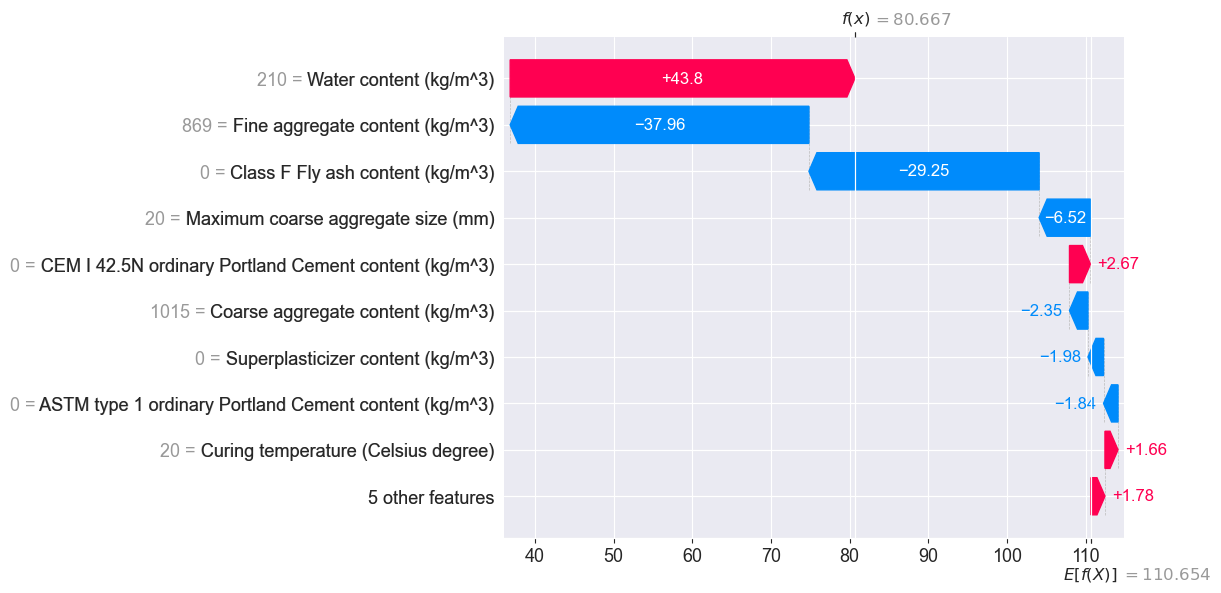

In [52]:
explainer = shap.Explainer(Tuned_forest.predict, X)
shap_values = explainer(X)
sample_ind = 42
shap.plots.waterfall(shap_values[sample_ind])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


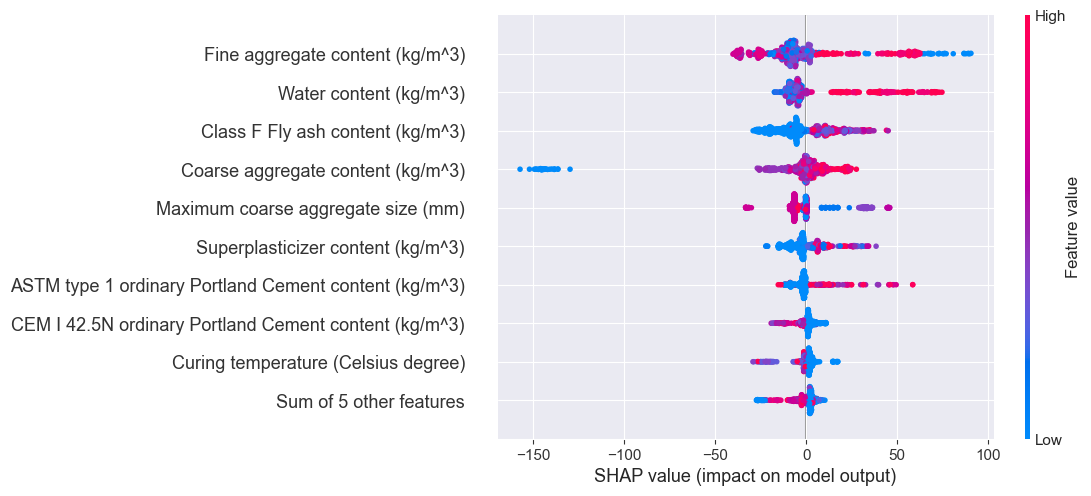

In [53]:
shap.plots.beeswarm(shap_values)

In [54]:
new_df_drop.iloc[42]

ASTM type 1 ordinary Portland Cement content (kg/m^3)      0.000
CEM I 42.5N ordinary Portland Cement content (kg/m^3)      0.000
CEM I 52.5N ordinary Portland Cement content (kg/m^3)    175.000
Class C Fly ash content (kg/m^3)                           0.000
Class F Fly ash content (kg/m^3)                           0.000
Slag content (kg/m^3)                                    175.000
Silica fume content (kg/m^3)                               0.000
Water content (kg/m^3)                                   210.000
Superplasticizer content (kg/m^3)                          0.000
Maximum coarse aggregate size (mm)                        20.000
Coarse aggregate content (kg/m^3)                       1015.000
Fine aggregate content (kg/m^3)                          869.000
Curing method                                              3.000
Curing temperature (Celsius degree)                       20.000
Slump (mm)                                                60.000
Name: 42, dtype: float64

In [55]:
y_pred = Tuned_forest.predict(X)
df_predictions = pd.DataFrame({'True Values': Y, 'Predicted Values': y_pred})

In [56]:
df_predictions

,True Values,Predicted Values
0,30.000,30.000
1,60.000,56.455
2,100.000,80.667
3,140.000,158.000
4,40.000,43.636
...,...,...
1967,90.000,92.000
1968,110.000,101.667
1969,65.000,68.333
1970,100.000,87.857


In [57]:
df_predictions['Difference'] = df_predictions['True Values'] - df_predictions['Predicted Values']
df_predictions

,True Values,Predicted Values,Difference
0,30.000,30.000,0.000
1,60.000,56.455,3.545
2,100.000,80.667,19.333
3,140.000,158.000,-18.000
4,40.000,43.636,-3.636
...,...,...,...
1967,90.000,92.000,-2.000
1968,110.000,101.667,8.333
1969,65.000,68.333,-3.333
1970,100.000,87.857,12.143


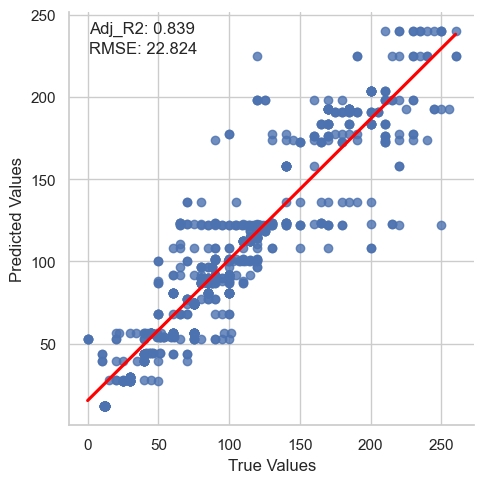

In [58]:
r2 = r2_score(df_predictions['True Values'], df_predictions['Predicted Values'])
adj_r2 = adj_r2_score(X, Y, y_pred)
rmse = mean_squared_error(df_predictions['True Values'], df_predictions['Predicted Values'], squared=False)

# Create the lmplot
sns.set(style="whitegrid")
lm_plot = sns.lmplot(data=df_predictions, x='True Values', y='Predicted Values', ci=True, line_kws={'color': 'red'})

# Annotate the plot with R2 and RMSE
plt.text(0.05, 0.95, f'Adj_R2: {adj_r2:.3f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.9, f'RMSE: {rmse:.3f}', transform=plt.gca().transAxes)

# Display the plot
plt.show()